### https://www.youtube.com/watch?v=6-dhdMDiYWQ

In [13]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin


In [14]:
yfin.pdr_override()
# import data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData["Close"]
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [15]:
stockList = ["CBA", "BHP", "TLS", "NAB", "WBC", "STO"]
stocks = [stock + '.ax' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

print(meanReturns)


[*********************100%***********************]  6 of 6 completed
BHP.AX    0.001136
CBA.AX    0.000418
NAB.AX   -0.000423
STO.AX    0.000066
TLS.AX    0.000475
WBC.AX    0.000193
dtype: float64


In [16]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)


### Monte carlo method

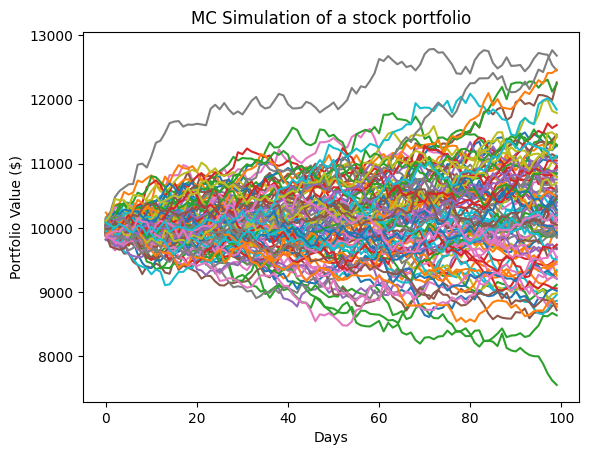

In [20]:
# num sims
mc_sims = 100
T = 100 # timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=(0.0))

initialPortfolio = 10000

for m in range(0, mc_sims):

    # assumed multivariate normal distribution and using cholesky decomoposition
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel("Days")
plt.title('MC Simulation of a stock portfolio')
plt.show()